<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install import_ipynb
import import_ipynb

In [3]:
!wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb -O "defs_common.ipynb"
from defs_common import *

--2020-01-02 17:56:09--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5602 (5.5K) [text/plain]
Saving to: ‘defs_common.ipynb’

defs_common.ipynb   100%[===================>]   5.47K  --.-KB/s    in 0s      

2020-01-02 17:56:09 (82.9 MB/s) - ‘defs_common.ipynb’ saved [5602/5602]

importing Jupyter notebook from defs_common.ipynb


In [0]:
import pandas as pd
import numpy as np

In [10]:
!cp "./drive/My Drive/sudoku_acquisition_output.bz2" "./sudoku_acquisition_output.bz2"
acquisitions = pd.read_pickle("./sudoku_acquisition_output.bz2")
acquisitions

,filename,data,digits
0,v2_train/image143.jpg,"[[[169, 168, 148], [169, 168, 148], [169, 168,...","[[0, 7, 1, 9, 0, 2, 0, 5, 0], [0, 0, 0, 0, 0, ..."
1,v2_train/image1077.jpg,"[[[176, 164, 150], [175, 164, 149], [175, 166,...","[[0, 7, 1, 0, 0, 0, 2, 0, 0], [0, 0, 0, 6, 8, ..."
2,v2_train/image82.jpg,"[[[124, 149, 119], [127, 152, 120], [130, 156,...","[[0, 0, 0, 0, 0, 9, 0, 0, 0], [2, 0, 0, 0, 8, ..."
3,v2_train/image1083.jpg,"[[[154, 154, 152], [154, 154, 152], [154, 154,...","[[0, 0, 7, 1, 0, 0, 4, 6, 0], [4, 0, 0, 0, 0, ..."
4,v2_train/image1081.jpg,"[[[183, 176, 166], [185, 178, 168], [190, 183,...","[[0, 0, 6, 0, 0, 2, 0, 3, 0], [0, 8, 0, 0, 5, ..."
...,...,...,...
351,./dataset/000000701/IMG_8782.JPG,"[[[25, 24, 29], [25, 24, 29], [22, 22, 23], [2...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ..."
352,./dataset/000000701/IMG_8769.JPG,"[[[178, 176, 164], [179, 175, 166], [182, 179,...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ..."
353,./dataset/000000701/IMG_8768.JPG,"[[[153, 152, 129], [154, 149, 130], [153, 150,...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ..."
354,./dataset/000000701/IMG_8772.JPG,"[[[201, 201, 169], [207, 201, 177], [205, 201,...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ..."


In [11]:
!cp "./drive/My Drive/sudoku_transformation_output.bz2" "./sudoku_transformation_output.bz2"
transformations = pd.read_pickle("./sudoku_transformation_output.bz2")
transformations

,filename,transform_source_contour,transform_target_contour,transform_matrix,transform_image
0,v2_train/image1077.jpg,"[[25, 95], [26, 452], [497, 439], [487, 92]]","[[0, 0], [0, 409], [409, 409], [409, 0]]","[[0.8644534351150756, -0.0024214381935996586, ...","[[[79, 75, 70], [80, 75, 71], [89, 83, 79], [9..."
2,v2_train/image1081.jpg,"[[45, 102], [45, 424], [447, 422], [441, 99]]","[[0, 0], [0, 360], [360, 360], [360, 0]]","[[0.9167319467225642, 1.7460144671830732e-17, ...","[[[109, 99, 92], [70, 59, 55], [74, 65, 59], [..."
5,v2_train/image1082.jpg,"[[55, 110], [58, 420], [463, 413], [469, 110]]","[[0, 0], [0, 358], [358, 358], [358, 0]]","[[0.8357188190752205, -0.008087601474921486, -...","[[[99, 90, 79], [68, 60, 52], [69, 62, 55], [6..."
6,v2_train/image1050.jpg,"[[31, 31], [19, 372], [395, 376], [387, 24]]","[[0, 0], [0, 356], [356, 356], [356, 0]]","[[1.0406580635136313, 0.036621398129511956, -3...","[[[138, 136, 141], [132, 125, 132], [134, 124,..."
7,v2_train/image1067.jpg,"[[38, 67], [47, 336], [387, 331], [380, 59]]","[[0, 0], [0, 305], [305, 305], [305, 0]]","[[0.9006112273512461, -0.03013197414929822, -3...","[[[85, 81, 79], [87, 84, 83], [82, 80, 78], [8..."
...,...,...,...,...,...
195,./dataset/000000701/IMG_8778.JPG,"[[93, 156], [32, 415], [327, 412], [382, 207]]","[[0, 0], [0, 266], [266, 266], [266, 0]]","[[0.6330617994074746, 0.14909949715774504, -82...","[[[92, 95, 100], [89, 91, 96], [89, 92, 97], [..."
196,./dataset/000000701/IMG_8779.JPG,"[[124, 134], [111, 405], [493, 390], [416, 168]]","[[0, 0], [0, 295], [295, 295], [295, 0]]","[[0.9213532829964697, 0.04419775896293028, -12...","[[[33, 23, 28], [34, 25, 33], [46, 35, 43], [9..."
197,./dataset/000000701/IMG_8769.JPG,"[[174, 57], [174, 409], [441, 378], [397, 155]]","[[0, 0], [0, 272], [272, 272], [272, 0]]","[[0.6110846981731074, -1.3671795355471964e-17,...","[[[54, 53, 58], [81, 80, 85], [56, 55, 60], [8..."
198,./dataset/000000701/IMG_8768.JPG,"[[135, 96], [126, 373], [479, 364], [415, 148]]","[[0, 0], [0, 285], [285, 285], [285, 0]]","[[0.7821439129915793, 0.025412618111639827, -1...","[[[121, 120, 126], [132, 131, 137], [121, 120,..."


In [12]:
images = acquisitions.merge(transformations, on="filename")
images

,filename,data,digits,transform_source_contour,transform_target_contour,transform_matrix,transform_image
0,v2_train/image1077.jpg,"[[[176, 164, 150], [175, 164, 149], [175, 166,...","[[0, 7, 1, 0, 0, 0, 2, 0, 0], [0, 0, 0, 6, 8, ...","[[25, 95], [26, 452], [497, 439], [487, 92]]","[[0, 0], [0, 409], [409, 409], [409, 0]]","[[0.8644534351150756, -0.0024214381935996586, ...","[[[79, 75, 70], [80, 75, 71], [89, 83, 79], [9..."
1,v2_train/image1081.jpg,"[[[183, 176, 166], [185, 178, 168], [190, 183,...","[[0, 0, 6, 0, 0, 2, 0, 3, 0], [0, 8, 0, 0, 5, ...","[[45, 102], [45, 424], [447, 422], [441, 99]]","[[0, 0], [0, 360], [360, 360], [360, 0]]","[[0.9167319467225642, 1.7460144671830732e-17, ...","[[[109, 99, 92], [70, 59, 55], [74, 65, 59], [..."
2,v2_train/image1082.jpg,"[[[182, 175, 169], [183, 176, 169], [184, 177,...","[[3, 4, 7, 0, 5, 1, 0, 0, 0], [0, 1, 9, 0, 0, ...","[[55, 110], [58, 420], [463, 413], [469, 110]]","[[0, 0], [0, 358], [358, 358], [358, 0]]","[[0.8357188190752205, -0.008087601474921486, -...","[[[99, 90, 79], [68, 60, 52], [69, 62, 55], [6..."
3,v2_train/image1050.jpg,"[[[189, 189, 187], [190, 191, 186], [191, 191,...","[[0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 5, 7, 0, ...","[[31, 31], [19, 372], [395, 376], [387, 24]]","[[0, 0], [0, 356], [356, 356], [356, 0]]","[[1.0406580635136313, 0.036621398129511956, -3...","[[[138, 136, 141], [132, 125, 132], [134, 124,..."
4,v2_train/image1067.jpg,"[[[176, 175, 173], [172, 170, 171], [174, 173,...","[[5, 0, 6, 0, 0, 4, 0, 7, 0], [0, 2, 0, 0, 0, ...","[[38, 67], [47, 336], [387, 331], [380, 59]]","[[0, 0], [0, 305], [305, 305], [305, 0]]","[[0.9006112273512461, -0.03013197414929822, -3...","[[[85, 81, 79], [87, 84, 83], [82, 80, 78], [8..."
...,...,...,...,...,...,...,...
148,./dataset/000000701/IMG_8778.JPG,"[[[134, 137, 114], [138, 136, 121], [138, 137,...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ...","[[93, 156], [32, 415], [327, 412], [382, 207]]","[[0, 0], [0, 266], [266, 266], [266, 0]]","[[0.6330617994074746, 0.14909949715774504, -82...","[[[92, 95, 100], [89, 91, 96], [89, 92, 97], [..."
149,./dataset/000000701/IMG_8779.JPG,"[[[84, 76, 55], [91, 78, 61], [95, 84, 66], [9...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ...","[[124, 134], [111, 405], [493, 390], [416, 168]]","[[0, 0], [0, 295], [295, 295], [295, 0]]","[[0.9213532829964697, 0.04419775896293028, -12...","[[[33, 23, 28], [34, 25, 33], [46, 35, 43], [9..."
150,./dataset/000000701/IMG_8769.JPG,"[[[178, 176, 164], [179, 175, 166], [182, 179,...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ...","[[174, 57], [174, 409], [441, 378], [397, 155]]","[[0, 0], [0, 272], [272, 272], [272, 0]]","[[0.6110846981731074, -1.3671795355471964e-17,...","[[[54, 53, 58], [81, 80, 85], [56, 55, 60], [8..."
151,./dataset/000000701/IMG_8768.JPG,"[[[153, 152, 129], [154, 149, 130], [153, 150,...","[[0, 0, 0, 0, 0, 0, 7, 0, 1], [8, 0, 0, 0, 0, ...","[[135, 96], [126, 373], [479, 364], [415, 148]]","[[0, 0], [0, 285], [285, 285], [285, 0]]","[[0.7821439129915793, 0.025412618111639827, -1...","[[[121, 120, 126], [132, 131, 137], [121, 120,..."


# Introduction

After having corrected the input image's perspective, the extraction of cells themself is rather easy under a few assumptions:

*   Each Sudoku grid consists of exactly 9 rows and 9 columns
*   Each Soduku grid is made up of equally sized squares



# Extraction of individual cells

Under these assumptions we do not have to detect any sort of lines, but instead we can simply devide the image into a 9-by-9 grid of squares.
Each square should then contain exactly one Sudoku cell.
This division is implemented by the method `extract_cells` which accepts an corrected image and returns a list of 9 rows each containing 9 columns corresponding to the cells of the Sudoku puzzle.

In [0]:
def extract_cells(image, n_rows=9, n_cols=9):
  split = np.array_split(image, n_rows)
  for i, x in enumerate(split):
    split[i] = np.array_split(x, n_cols, axis=1)
  #show_images(split[0])
  return split

cells = [extract_cells(x) for x in images["transform_image"]]

The variable `cells` now contains all extracted cell images. The element `cells[i][j][k]` contains the image of the cell in the `i`-th image located in the `j`-th row and the `k`-th column.
Using the method `show_cells` we can visualize the extracted cell images of a puzzle.

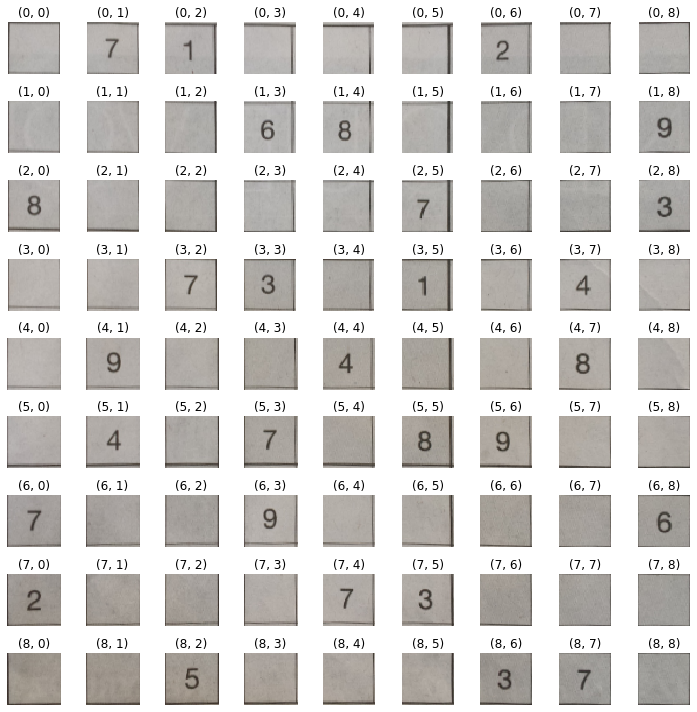

In [9]:
show_cells(cells[0])

# Export

In [0]:
df_filenames = []
df_cell_images = []
df_cell_rows = []
df_cell_cols = []
df_cell_digits = []

for index, row in images.iterrows():
  for i_row in range(9):
    for i_col in range(9):
      df_filenames.append(row["filename"])
      df_cell_images.append(cells[index][i_row][i_col])
      df_cell_rows.append(i_row)
      df_cell_cols.append(i_col)
      df_cell_digits.append(row["digits"][i_row][i_col])

In [0]:
df = pd.DataFrame({
    "filename": df_filenames,
    "row": df_cell_rows,
    "col": df_cell_cols,
    "image": df_cell_images,
    "digit": df_cell_digits
})

In [16]:
df

,filename,row,col,image,digit
0,v2_train/image1077.jpg,0,0,"[[[79, 75, 70], [80, 75, 71], [89, 83, 79], [9...",0
1,v2_train/image1077.jpg,0,1,"[[[111, 109, 103], [108, 106, 101], [112, 110,...",7
2,v2_train/image1077.jpg,0,2,"[[[166, 163, 158], [170, 167, 161], [174, 170,...",1
3,v2_train/image1077.jpg,0,3,"[[[187, 183, 180], [190, 186, 183], [184, 180,...",0
4,v2_train/image1077.jpg,0,4,"[[[190, 186, 181], [190, 187, 182], [188, 184,...",0
...,...,...,...,...,...
12388,./dataset/000000701/IMG_8772.JPG,8,4,"[[[90, 89, 90], [103, 101, 102], [113, 111, 11...",0
12389,./dataset/000000701/IMG_8772.JPG,8,5,"[[[106, 103, 105], [111, 109, 110], [112, 110,...",0
12390,./dataset/000000701/IMG_8772.JPG,8,6,"[[[98, 98, 100], [110, 110, 110], [111, 111, 1...",0
12391,./dataset/000000701/IMG_8772.JPG,8,7,"[[[100, 99, 99], [112, 110, 111], [114, 112, 1...",0


In [0]:
df.to_pickle("./sudoku_extraction_output.bz2")

In [0]:
!cp "./sudoku_extraction_output.bz2" "./drive/My Drive/sudoku_extraction_output.bz2"